In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

from src.parameters import PROCESSED_DATA_DIR

In [3]:
paths = PROCESSED_DATA_DIR + '/*.nc'

replay_info = xr.open_mfdataset(
    paths=paths, group='replay_info'
).to_dataframe().set_index(['animal', 'day', 'epoch', 'ripple_number']).dropna()
replay_info.head(5)

start_time        end_time  \
animal day epoch ripple_number                                   
Cor    1   2     1             00:22:39.780925 00:22:39.822279   
                 2             00:23:16.029707 00:23:16.086402   
                 3             00:23:16.266492 00:23:16.349200   
                 4             00:23:21.040878 00:23:21.134258   
                 5             00:23:21.850616 00:23:21.940661   

                               ripple_duration   predicted_state  \
animal day epoch ripple_number                                     
Cor    1   2     1             00:00:00.041354  Outbound-Forward   
                 2             00:00:00.056695  Outbound-Forward   
                 3             00:00:00.082708  Outbound-Forward   
                 4             00:00:00.093380  Outbound-Forward   
                 5             00:00:00.090045  Outbound-Forward   

                                predicted_state_probability replay_task  \
animal day epoch ripple_number                                            
Cor    1   2     1                                 0.641800    Outbound   
                 2                                 0.384665    Outbound   
                 3                                 0.668583    Outbound   
                 4                                 0.515439    Outbound   
                 5                                 0.524470    Outbound   

                               replay_order session_time  \
animal day epoch ripple_number                             
Cor    1   2     1                  Forward        early   
                 2                  Forward        early   
                 3                  Forward        early   
                 4                  Forward        early   
                 5                  Forward        early   

                                number_of_unique_spiking  number_of_spikes  \
animal day epoch ripple_number                                               
Cor    1   2     1                                     9                16   
                 2                                     8                31   
                 3                                    10                36   
                 4                                     9               101   
                 5                                     9                42   

                               trajectory_direction trajectory_turn  \
animal day epoch ripple_number                                        
Cor    1   2     1                         Outbound            Left   
                 2                          Inbound           Right   
                 3                          Inbound           Right   
                 4                          Inbound           Right   
                 5                          Inbound           Right   

                                trial_number  linear_distance  x_position  \
animal day epoch ripple_number                                              
Cor    1   2     1                       2.0        24.748510  279.434956   
                 2                      27.0         3.713869  270.180000   
                 3                      27.0         3.509295  269.710717   
                 4                      27.0         0.000000  279.300000   
                 5                      27.0         0.000000  279.300000   

                                y_position  head_direction     speed  \
animal day epoch ripple_number                                         
Cor    1   2     1              169.860000       -1.960139  2.689293   
                 2              190.380000        2.694031  2.934563   
                 3              190.849283        2.512796  0.664630   
                 4              198.360000        1.503219  0.016451   
                 5              198.360000        1.570796  0.167725   

                                linear_position replay_moti

In [6]:
replay_info['session_time'] = pd.Categorical(
    replay_info.session_time, ordered=True,
    categories=['early', 'middle', 'late'])

replay_info['replay_task'] = replay_info.replay_task.where(
    replay_info.predicted_state_probability >= 0.8, 'Unclassified')
replay_info['replay_order'] = replay_info.replay_order.where(
    replay_info.predicted_state_probability >= 0.8, 'Unclassified')
replay_info['replay_motion'] = replay_info.replay_motion.where(
    replay_info.predicted_state_probability >= 0.8, 'Unclassified')
replay_info['predicted_state'] = replay_info.predicted_state.where(
    replay_info.predicted_state_probability >= 0.8, 'Unclassified')

In [35]:
set1_color = sns.color_palette('Set2', n_colors=4)

pal = {
    'Forward': 'seagreen',
    'Reverse': 'gray',
    'Inbound': 'red',
    'Outbound': 'blue',
    'towards': 'pink',
    'away': 'purple',
    'Unclassified': 'lightgrey',
    'Inbound-Forward': set1_color[0],
    'Inbound-Reverse': set1_color[1],
    'Outbound-Forward': set1_color[2],
    'Outbound-Reverse': set1_color[3],
}

## Over animals

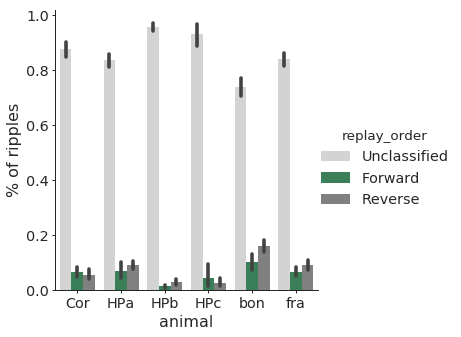

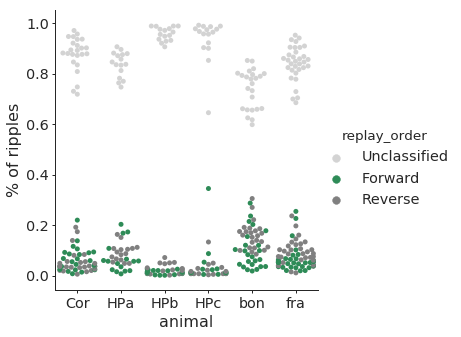

In [17]:
covariate = 'replay_order'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=pal, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=pal, size=5);

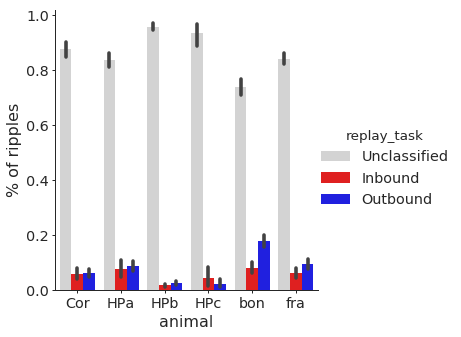

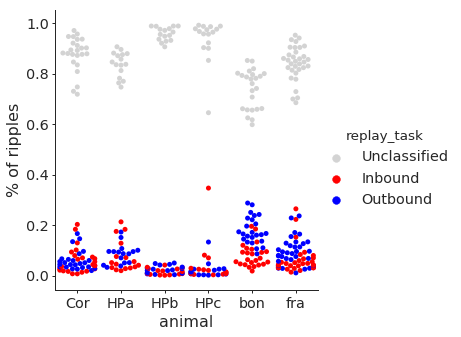

In [19]:
covariate = 'replay_task'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=pal, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=pal, size=5);

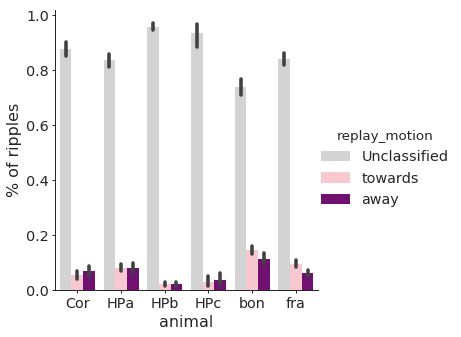

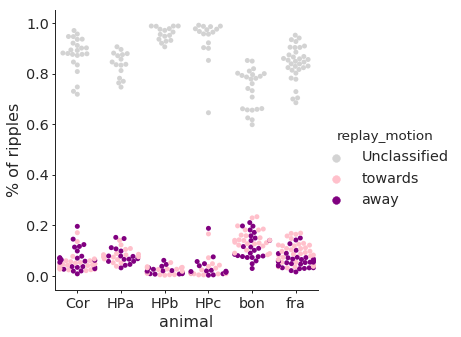

In [20]:
covariate = 'replay_motion'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=pal, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=pal, size=5);

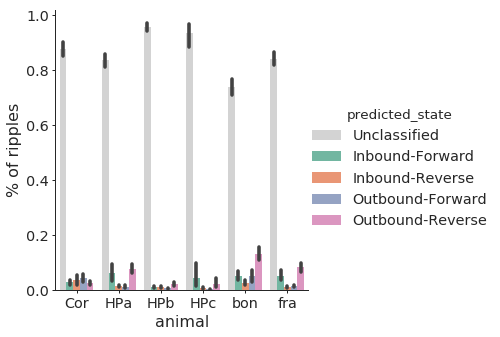

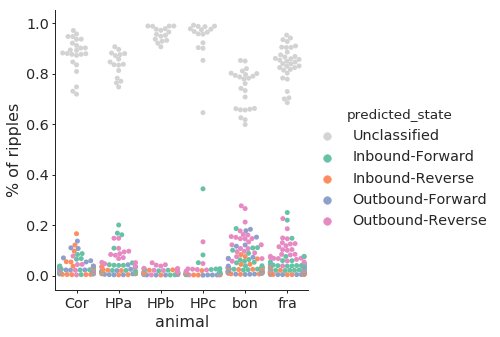

In [39]:
covariate = 'predicted_state'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index())

sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               palette=pal, size=5, kind='bar');
sns.factorplot(data=replay_percentage, x='animal', y='% of ripples', hue=covariate,
               kind='swarm', palette=pal, size=5);

## Over Epochs

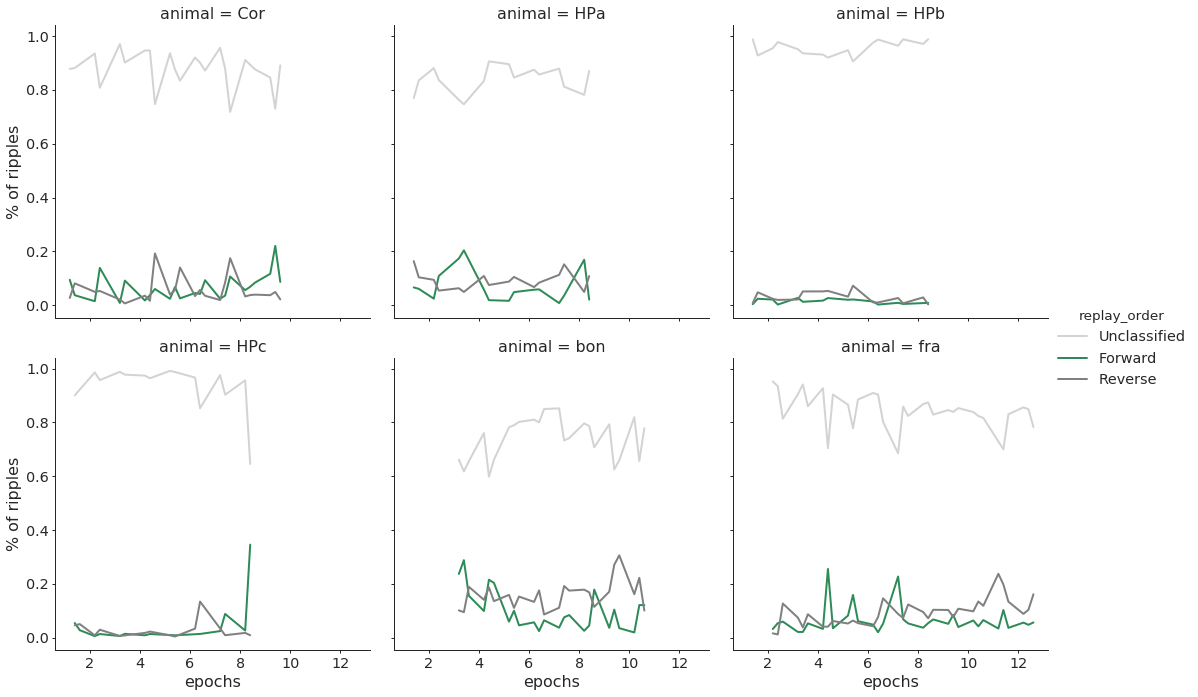

In [31]:
covariate = 'replay_order'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
 .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=pal, size=5)

g = g.map(plt.plot, 'epochs', '% of ripples')
g.add_legend();

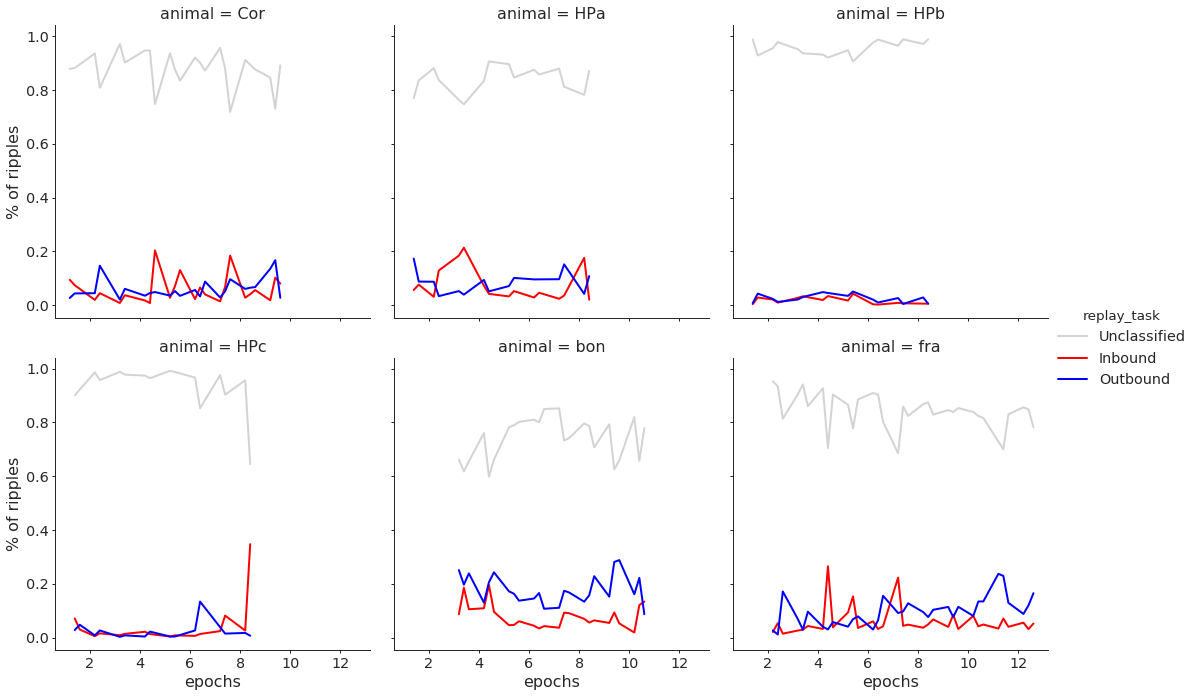

In [32]:
covariate = 'replay_task'

replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=pal, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples')
g.add_legend();

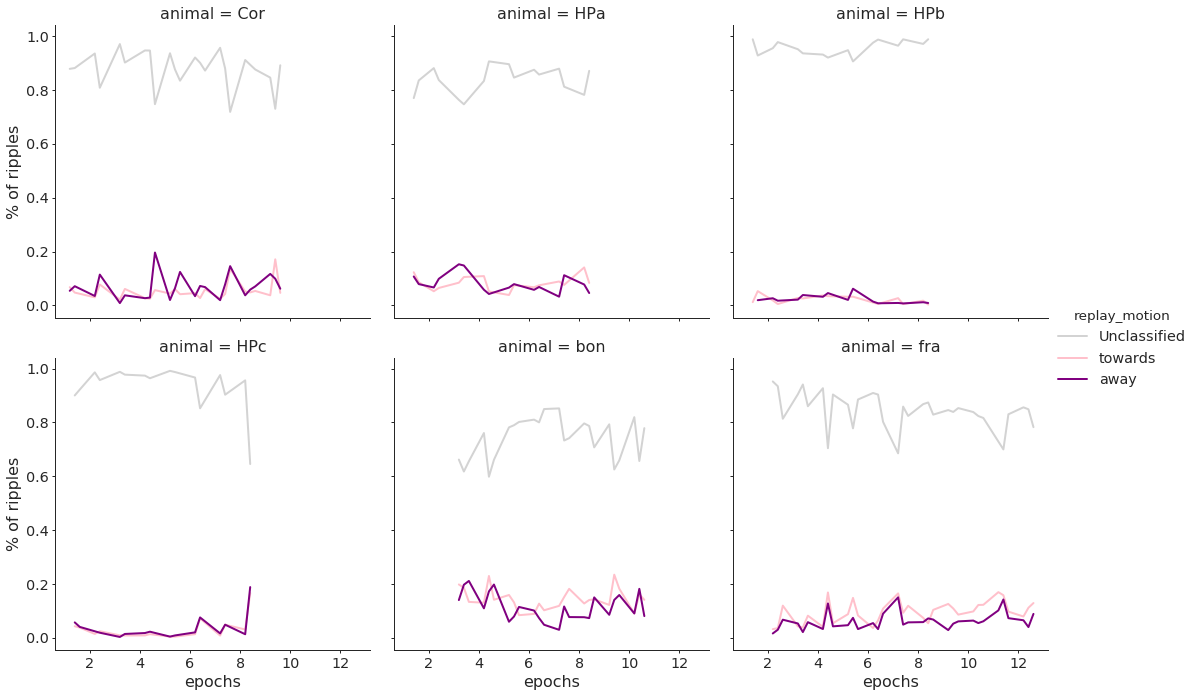

In [33]:
covariate = 'replay_motion'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=pal, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples')
g.add_legend();

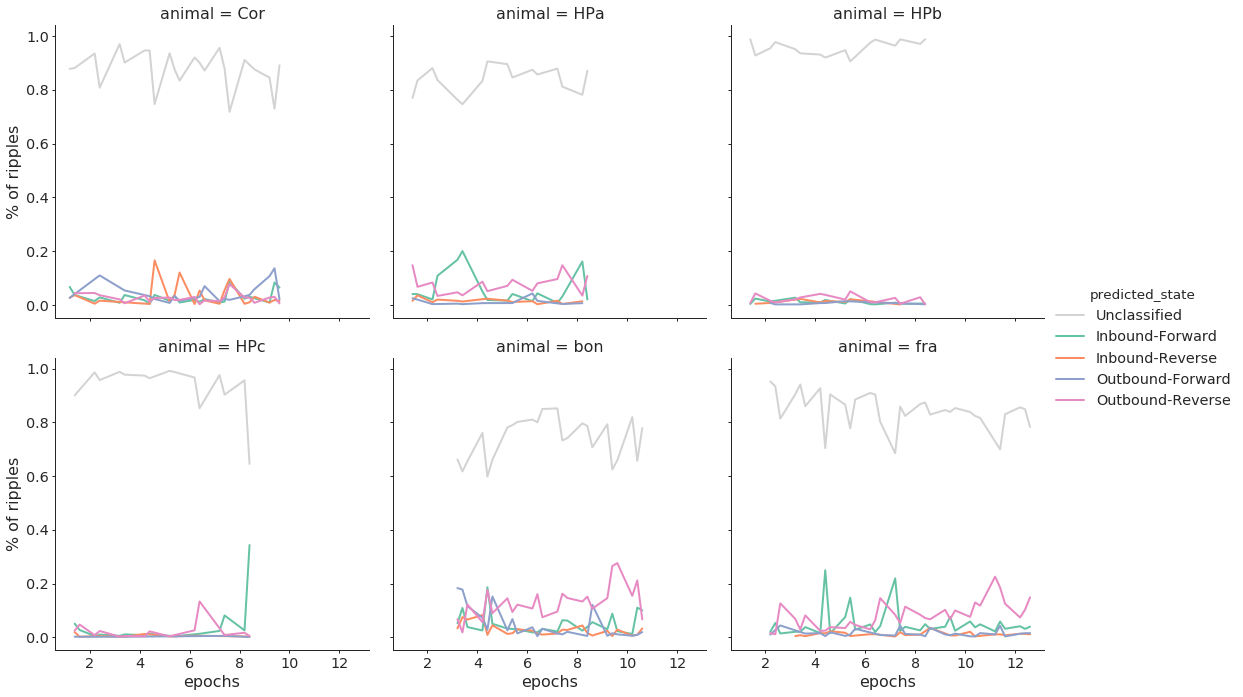

In [36]:
covariate = 'predicted_state'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('% of ripples')
  .reset_index()
 .assign(epochs=lambda df: df.day + df.epoch * 0.1))


g = sns.FacetGrid(data=replay_percentage, col='animal', col_wrap=3,
                  hue=covariate, palette=pal, size=5)
g = g.map(plt.plot, 'epochs', '% of ripples')
g.add_legend();

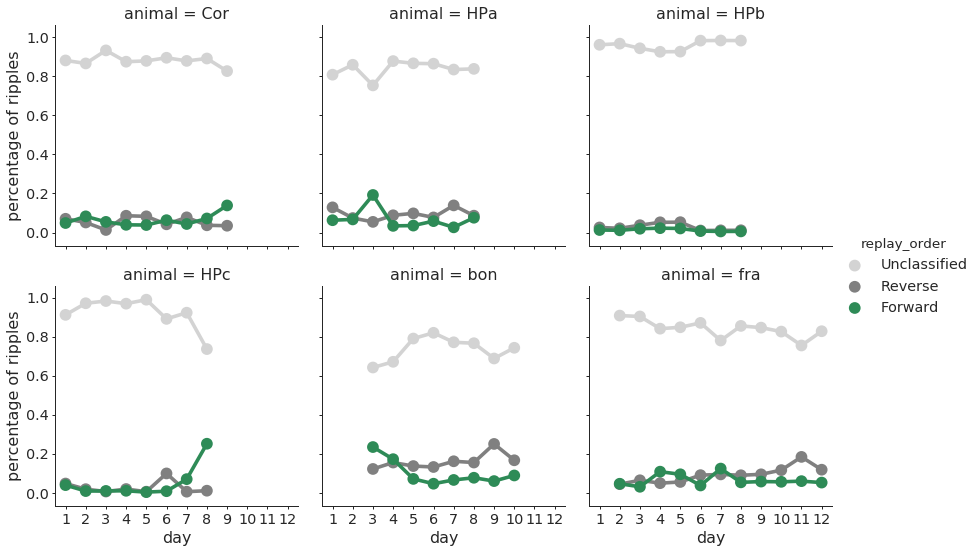

In [23]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=pal);

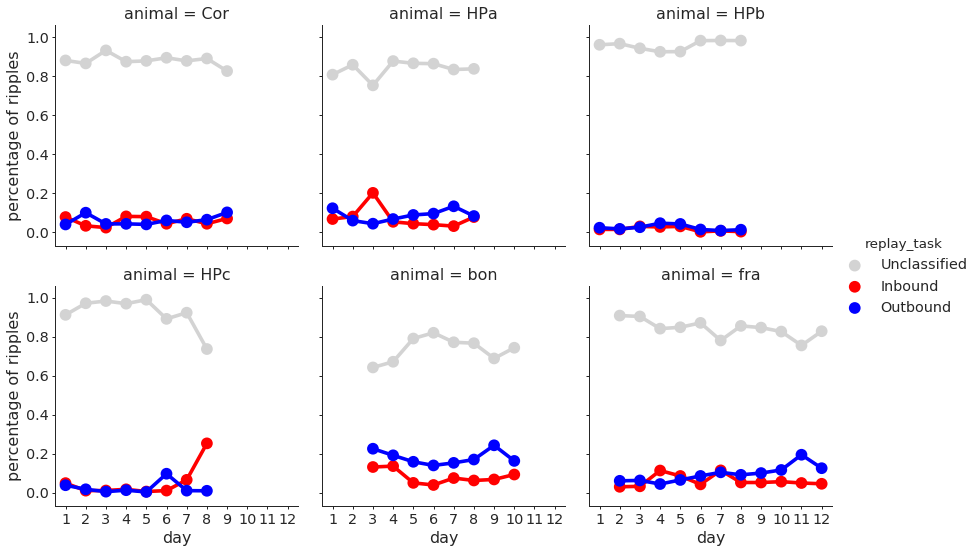

In [24]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=pal);

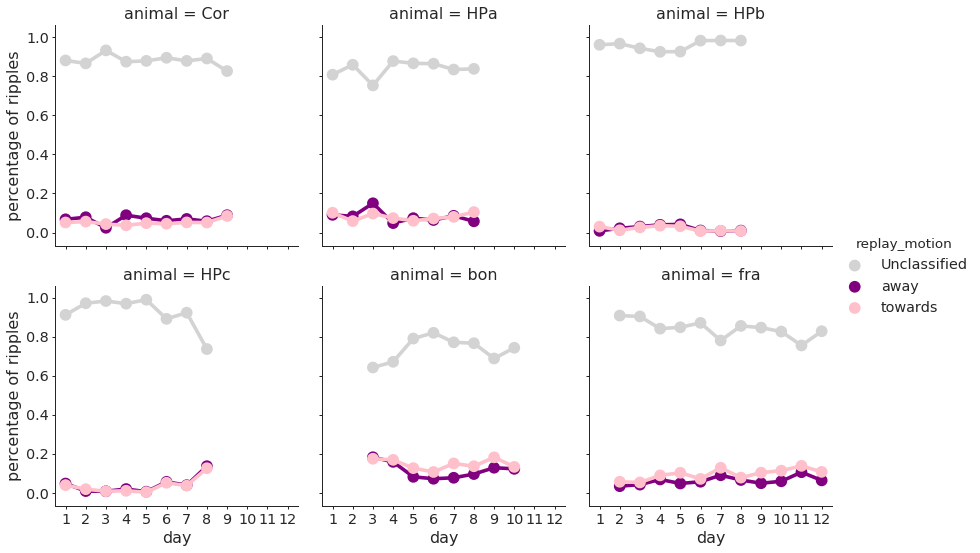

In [25]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=pal);

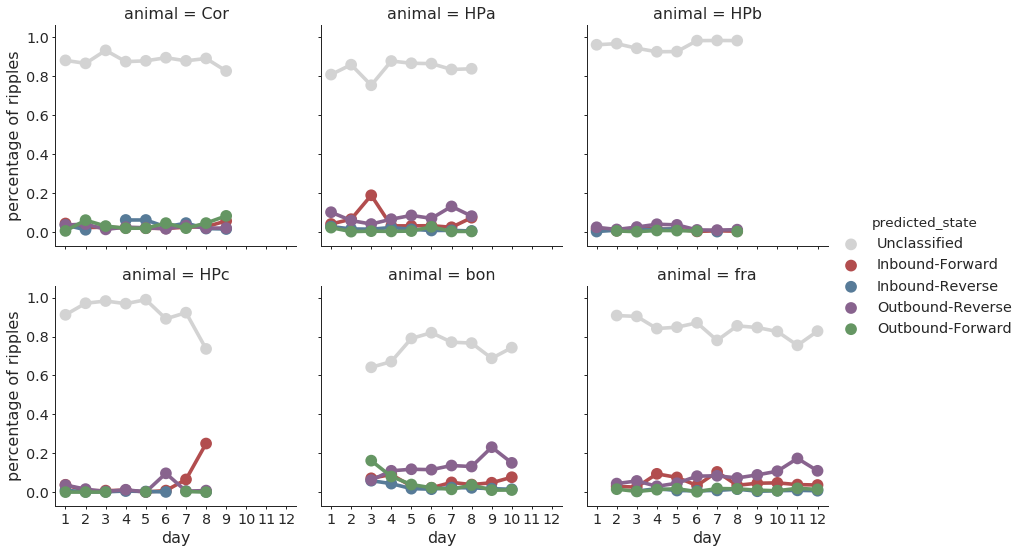

In [26]:
covariate = 'predicted_state'
percentage_of_ripples = (replay_info.reset_index()
 .groupby(['animal', 'day'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples',
               hue=covariate, col='animal', col_wrap=3, palette=pal);

## Within session

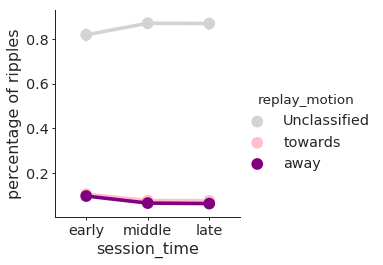

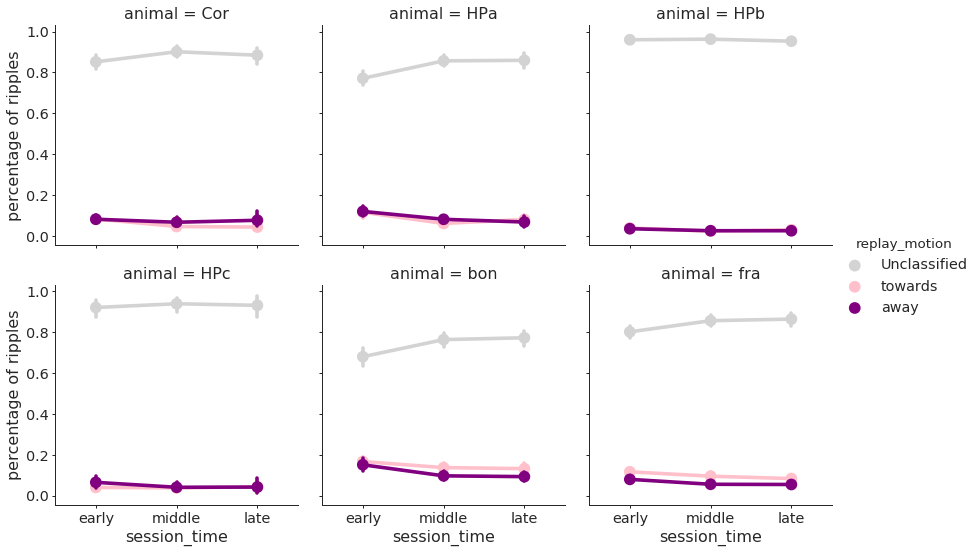

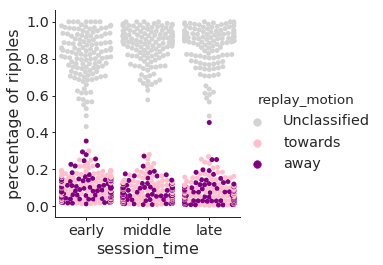

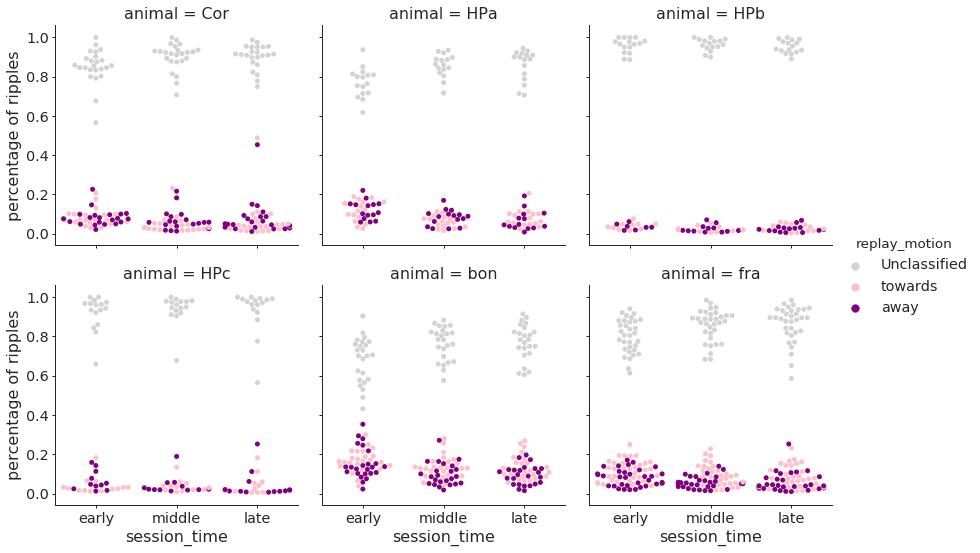

In [12]:
covariate = 'replay_motion'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=pal);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=pal, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=pal);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=pal);

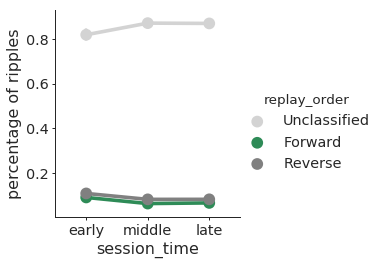

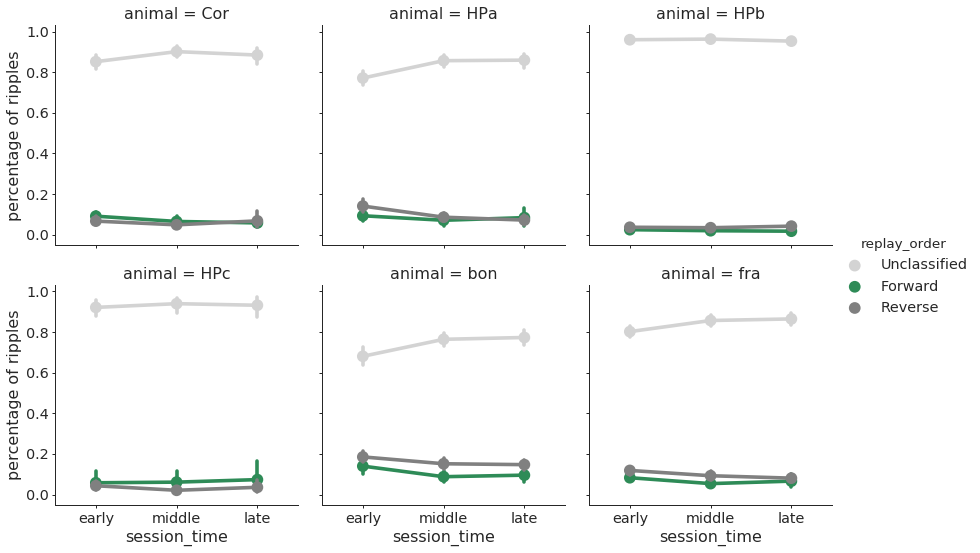

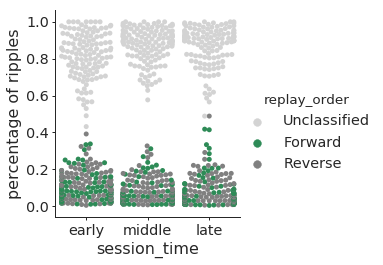

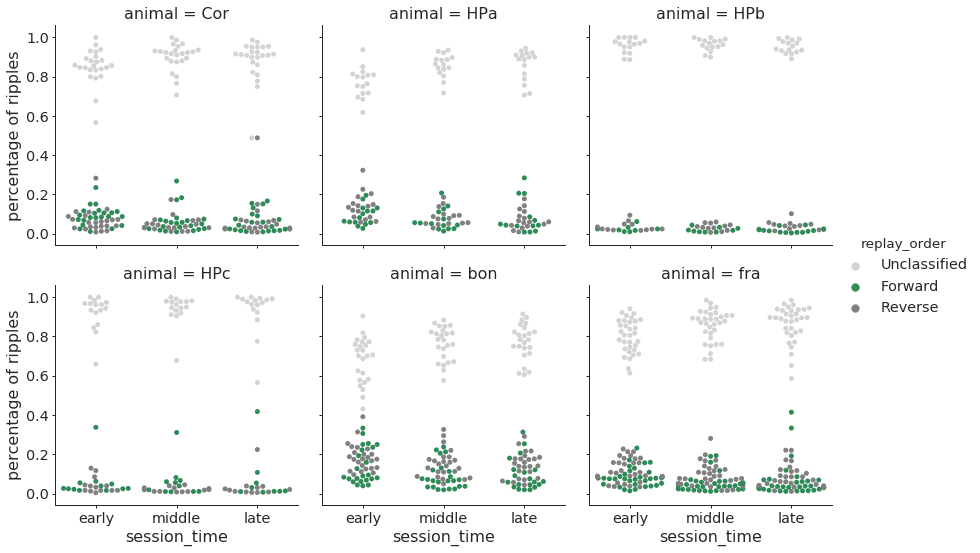

In [14]:
covariate = 'replay_order'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=pal);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=pal, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=pal);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=pal);

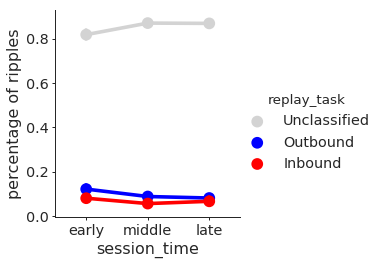

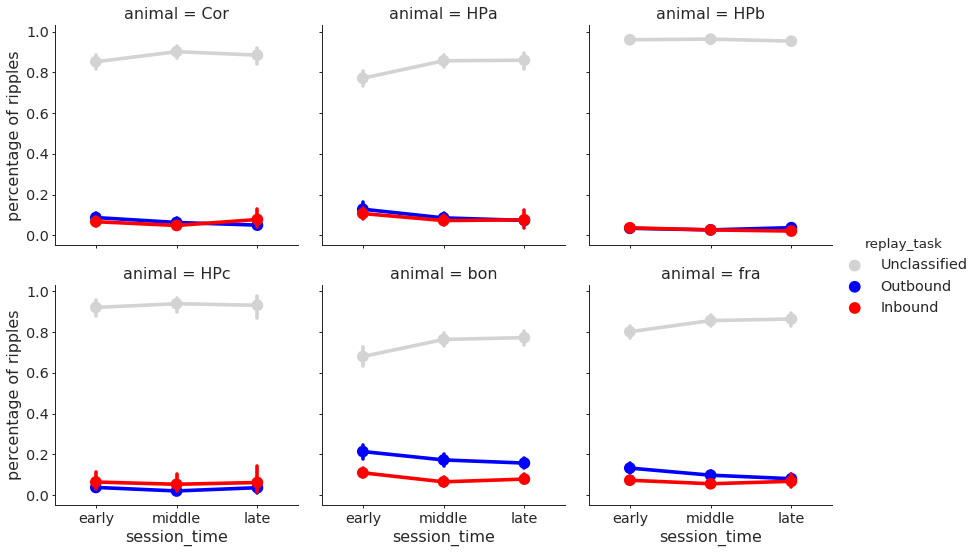

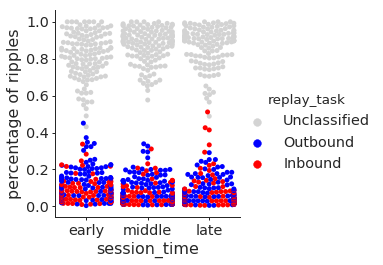

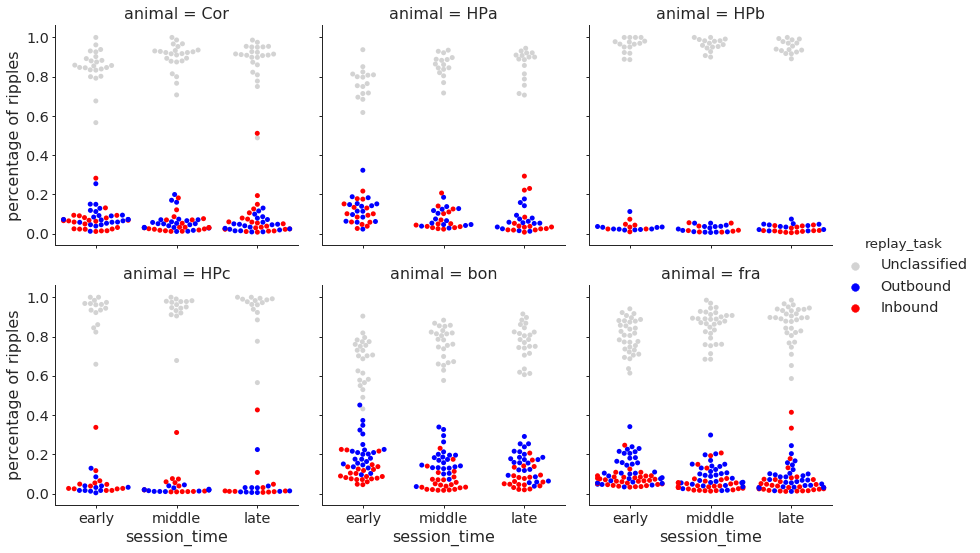

In [15]:
covariate = 'replay_task'
percentage_of_ripples = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, palette=pal);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', palette=pal, col_wrap=3);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               kind='swarm', palette=pal);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=pal);

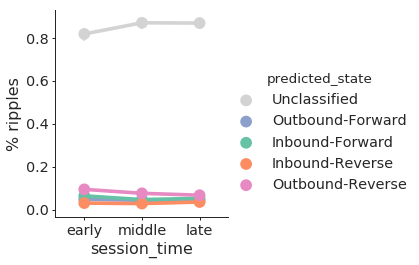

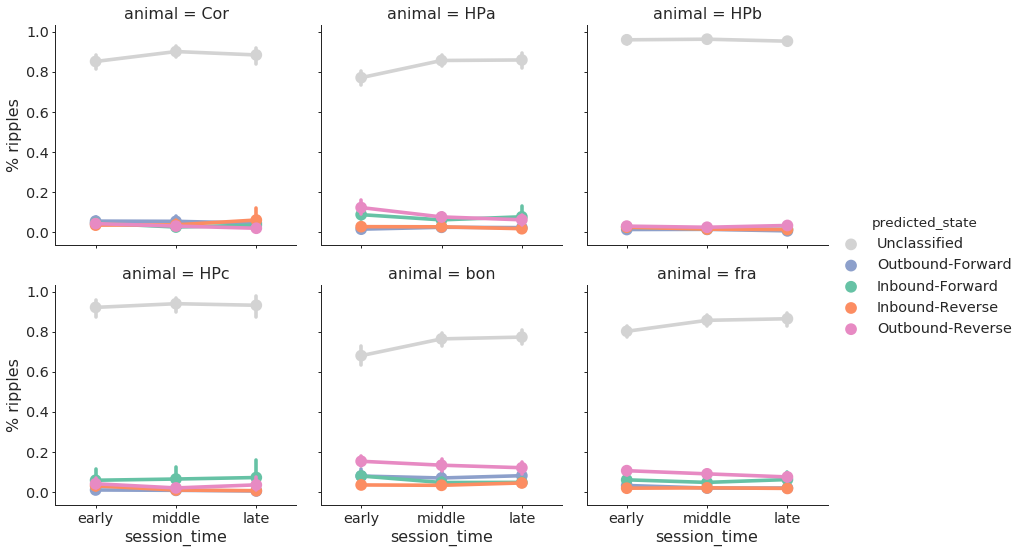

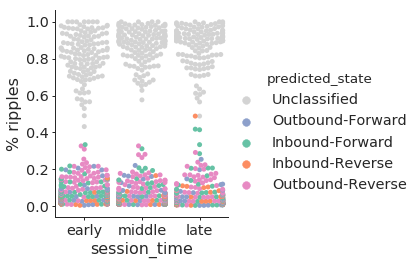

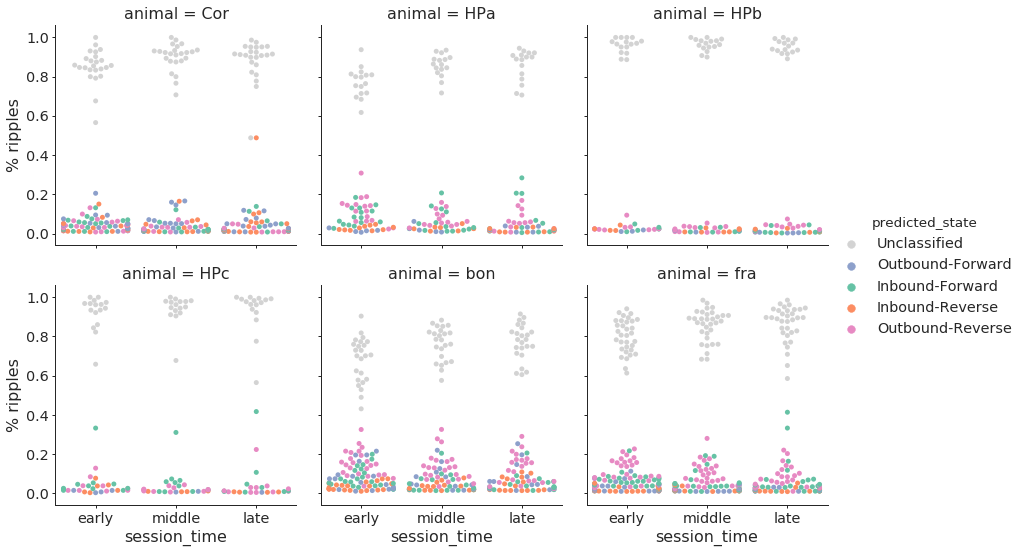

In [38]:
covariate = 'predicted_state'
replay_percentage = (replay_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('% ripples').reset_index())

sns.factorplot(data=replay_percentage, x='session_time', y='% ripples', hue=covariate, palette=pal);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples',
               hue=covariate, col='animal', col_wrap=3, palette=pal);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples',
               hue=covariate, kind='swarm', palette=pal);
sns.factorplot(data=replay_percentage, x='session_time', y='% ripples', hue=covariate,
               col='animal', col_wrap=3, kind='swarm', palette=pal);

## Position of Animal during Replay Types

In [42]:
paths = PROCESSED_DATA_DIR + '/*.nc'
def preprocess(df):
    return df.loc[:, ['x_position', 'y_position']]

position_info = xr.open_mfdataset(
    paths=paths, group='position_info', preprocess=preprocess,
).to_dataframe().set_index(['animal', 'day', 'epoch', 'time']).dropna()


position_info.head(5)

KeyboardInterrupt: 

In [25]:
path = '../Processed-Data/bon_03_02.nc'
position = xr.open_dataset(path, 'position_info').to_dataframe()
replay = xr.open_dataset(path, 'replay_info').to_dataframe()

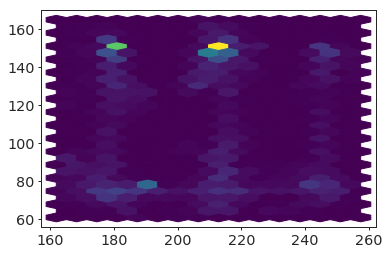

In [32]:
plt.hexbin(position.x_position, position.y_position, gridsize=(15, 15), cmap='viridis')

In [40]:
def occupancy_normalized_hexbin(x, y, all_x, all_y, ax=None,
                                gridsize=(3, 3), **kwargs):
    '''Bins (x, y) into hexagonal grid and normalizes the
    count by the binned count of (all_x, all_y).
    
    Useful when measuring the frequency of events over time 
    and space when the time spent in each bin is not equal.
    
    Parameters
    ----------
    x : numpy.ndarray
        Grid position at event
    y : numpy.ndarray
        Grid position at event
    all_x : numpy.ndarray
        Grid position over all time. For normalization.
    all_y : numpy.ndarray
        Grid position over all time. For normalization.
    gridsize : array-like, shape (2,), optional
        Size of the grid.
    **kwargs : hexbin keyword arguments, optional
    
    Returns
    -------
    axis_handle : a `~matplotlib.collections.PolyCollection` instance
    
    '''
    if ax is None:
        ax = plt.gca()
    occupancy = ax.hexbin(all_x, all_y, gridsize=gridsize)
    plt.cla()
    occupancy_count = occupancy.get_array()
    hexbin_centers = occupancy.get_offsets()
    event_count = ax.hexbin(x, y, gridsize=gridsize).get_array()
    plt.cla()
    normalized_count = event_count / occupancy_count
    mappable = ax.hexbin(hexbin_centers[:, 0], hexbin_centers[:, 1],
                     C=normalized_count, gridsize=gridsize, **kwargs)
    ax.figure.colorbar(mappable)
    return mappable

/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


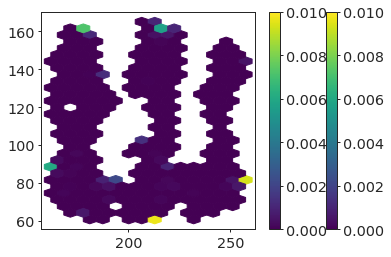

In [41]:
fig, ax = plt.subplots()
c = occupancy_normalized_hexbin(
    replay.x_position, replay.y_position,
    position.x_position, position.y_position, ax=ax,
    gridsize=(15, 15), vmin=0, vmax=1E-2, cmap='viridis')
plt.colorbar(c);

/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


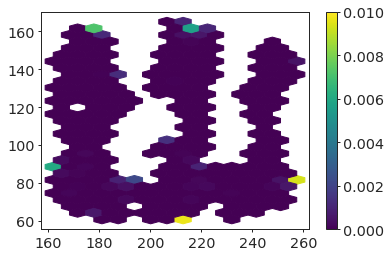

In [42]:
from functools import partial
f = partial(occupancy_normalized_hexbin,
    all_x=position.x_position, all_y=position.y_position,
    gridsize=(15, 15), vmin=0, vmax=1E-2, cmap='viridis')
f.__module__ = None

f(replay.x_position, replay.y_position)

/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


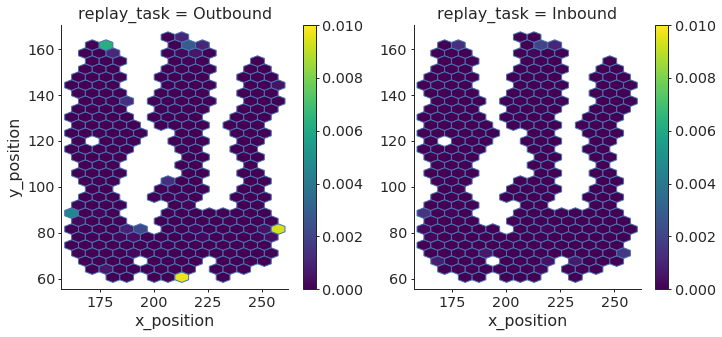

In [43]:
g = sns.FacetGrid(replay, col='replay_task', col_wrap=3,
                  size=5)

g = g.map(f, 'x_position', 'y_position')

/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/projectnb/braincom/edeno/conda_envs/Categorize_Replay_2017/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


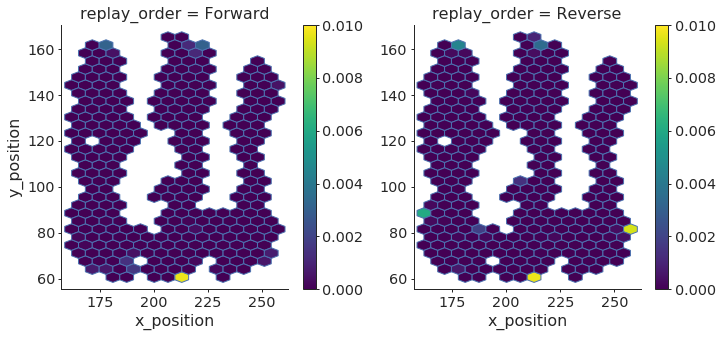

In [44]:
g = sns.FacetGrid(replay, col='replay_order', col_wrap=3,
                  size=5)
g = g.map(f, 'x_position', 'y_position')

In [47]:
position['animal'], position['day'], position['epoch'] = 'bon', 3, 2
position.head(5)

,trajectory_category_ind,trajectory_direction,trajectory_turn,trial_number,linear_distance,x_position,y_position,head_direction,speed,linear_position,animal,day,epoch
time,,,,,,,,,,,,,
01:02:08.973600,0.0,Outbound,Left,1.0,20.239501,215.548302,128.696605,1.929138,7.920192,20.239501,bon,3,2
01:02:08.974267,0.0,Outbound,Left,1.0,20.239501,215.548302,128.696605,1.929138,7.920192,20.239501,bon,3,2
01:02:08.974934,0.0,Outbound,Left,1.0,20.239501,215.548302,128.696605,1.929138,7.920192,20.239501,bon,3,2
01:02:08.975601,0.0,Outbound,Left,1.0,20.239501,215.548302,128.696605,1.929138,7.920192,20.239501,bon,3,2
01:02:08.976268,0.0,Outbound,Left,1.0,20.239501,215.548302,128.696605,1.929138,7.920192,20.239501,bon,3,2


In [46]:
replay.head(5)

,ripple_number,start_time,end_time,animal,day,epoch,ripple_duration,predicted_state,predicted_state_probability,replay_task,...,trajectory_direction,trajectory_turn,trial_number,linear_distance,x_position,y_position,head_direction,speed,linear_position,replay_motion
index,,,,,,,,,,,,,,,,,,,,,
0,1,01:02:20.169195,01:02:20.263337,bon,3,2,00:00:00.094142,Outbound-Forward,0.636634,Outbound,...,Outbound,Left,1.0,0.899379,211.950000,148.059499,1.974715,1.089241e+00,0.899379,away
1,2,01:02:22.811849,01:02:22.926001,bon,3,2,00:00:00.114152,Outbound-Forward,0.787865,Outbound,...,Outbound,Left,1.0,0.008388,212.031499,148.950000,1.996380,5.149424e-01,0.008388,towards
2,3,01:02:27.067976,01:02:27.178126,bon,3,2,00:00:00.110150,Outbound-Forward,0.805735,Outbound,...,Outbound,Left,1.0,4.950396,213.300000,144.000000,1.815775,1.826588e-03,4.950396,away
3,4,01:02:27.923165,01:02:27.967759,bon,3,2,00:00:00.044594,Outbound-Forward,0.771572,Outbound,...,Outbound,Left,1.0,4.950396,213.300000,144.000000,1.815775,1.212658e-10,4.950396,away
4,5,01:02:29.255069,01:02:29.303855,bon,3,2,00:00:00.048786,Outbound-Forward,0.737518,Outbound,...,Outbound,Left,1.0,4.950396,213.300000,144.000000,1.815775,7.863218e-03,4.950396,away
